In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Data analysis

In [2]:
df_train=pd.read_csv("train_small.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160082 entries, 0 to 1160081
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1160082 non-null  int64  
 1   date         1160082 non-null  object 
 2   store_nbr    1160082 non-null  int64  
 3   family       1160082 non-null  object 
 4   sales        1160082 non-null  float64
 5   onpromotion  1160082 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 53.1+ MB


In [4]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,1.160082e+06,1.160082e+06,1.160082e+06,1.160082e+06
mean,2.420846e+06,2.750000e+01,4.586756e+02,5.622966e+00
std,3.348870e+05,1.558579e+01,1.319650e+03,1.769795e+01
min,1.840806e+06,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.130826e+06,1.400000e+01,2.000000e+00,0.000000e+00
50%,2.420846e+06,2.750000e+01,2.400000e+01,0.000000e+00
75%,2.710867e+06,4.100000e+01,2.630000e+02,2.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [5]:
df_stores=pd.read_csv("stores.csv")

In [6]:
df_oil=pd.read_csv("oil.csv")

In [7]:
df_holidays_events=pd.read_csv("holidays_events.csv")

In [8]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [9]:
df_train_st=df_train.merge(df_stores,on="store_nbr",how="left")

In [10]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160082 entries, 0 to 1160081
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1160082 non-null  int64  
 1   date         1160082 non-null  object 
 2   store_nbr    1160082 non-null  int64  
 3   family       1160082 non-null  object 
 4   sales        1160082 non-null  float64
 5   onpromotion  1160082 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 53.1+ MB


In [12]:
df_train_st_oil=df_train_st.merge(df_oil,on="date",how="left")

In [13]:
df_holidays_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [14]:
df_train_st_oil_holid=df_train_st_oil.merge(df_holidays_events,on="date",how="left")

In [15]:
df_train_st_oil_holid.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188594 entries, 0 to 1188593
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1188594 non-null  int64  
 1   date         1188594 non-null  object 
 2   store_nbr    1188594 non-null  int64  
 3   family       1188594 non-null  object 
 4   sales        1188594 non-null  float64
 5   onpromotion  1188594 non-null  int64  
 6   city         1188594 non-null  object 
 7   state        1188594 non-null  object 
 8   type_x       1188594 non-null  object 
 9   cluster      1188594 non-null  int64  
 10  dcoilwtico   807246 non-null   float64
 11  type_y       238788 non-null   object 
 12  locale       238788 non-null   object 
 13  locale_name  238788 non-null   object 
 14  description  238788 non-null   object 
 15  transferred  238788 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 154.2+ MB


In [16]:
#We are missing daily oil price info for this many days
df_train_st_oil_holid["dcoilwtico"].isnull().sum()

381348

In [17]:
#These are the days that don't have any associated holiday, so we can fill corresponding info as not a holiday

In [18]:
#Rename two columns
df_train_st_oil_holid=df_train_st_oil_holid.rename({"type_x":"store_type","type_y":"day_type"},axis=1)

In [19]:
df_train_st_oil_holid.tail(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,dcoilwtico,day_type,locale,locale_name,description,transferred
1188584,3000878,2017-08-15,9,MAGAZINES,11.000,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188585,3000879,2017-08-15,9,MEATS,449.228,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188586,3000880,2017-08-15,9,PERSONAL CARE,522.000,11,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188587,3000881,2017-08-15,9,PET SUPPLIES,6.000,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188588,3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188589,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188590,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188591,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188592,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
1188593,3000887,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [20]:
df_train_st_oil_holid["day_type"].unique()

array(['Holiday', nan, 'Event', 'Additional', 'Transfer', 'Bridge',
       'Work Day'], dtype=object)

In [21]:
df_train_st_oil_holid["transferred"].unique()

array([False, nan, True], dtype=object)

In [22]:
df_train_st_oil_holid["description"].nunique()

85

In [23]:
df_train_st_oil_holid["locale"].unique()

array(['National', nan, 'Regional', 'Local'], dtype=object)

In [24]:
df_train_st_oil_holid["locale_name"].unique()

array(['Ecuador', nan, 'Santo Domingo de los Tsachilas', 'Santa Elena',
       'Guaranda', 'Latacunga', 'Ambato', 'Quito', 'Loja', 'Salinas',
       'Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Machala', 'Imbabura', 'El Carmen', 'Santo Domingo', 'Cayambe',
       'Guayaquil', 'Esmeraldas', 'Ibarra', 'Quevedo'], dtype=object)

In [25]:
df_train_st_oil_holid["day_type"].fillna("Regular Day",inplace=True)
df_train_st_oil_holid["locale"].fillna("National",inplace=True)
df_train_st_oil_holid["locale_name"].fillna("Ecuador",inplace=True)
df_train_st_oil_holid["transferred"].fillna("False",inplace=True)
df_train_st_oil_holid["description"].fillna("Not a holiday",inplace=True)

In [26]:
df_train_st_oil_holid.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188594 entries, 0 to 1188593
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1188594 non-null  int64  
 1   date         1188594 non-null  object 
 2   store_nbr    1188594 non-null  int64  
 3   family       1188594 non-null  object 
 4   sales        1188594 non-null  float64
 5   onpromotion  1188594 non-null  int64  
 6   city         1188594 non-null  object 
 7   state        1188594 non-null  object 
 8   store_type   1188594 non-null  object 
 9   cluster      1188594 non-null  int64  
 10  dcoilwtico   807246 non-null   float64
 11  day_type     1188594 non-null  object 
 12  locale       1188594 non-null  object 
 13  locale_name  1188594 non-null  object 
 14  description  1188594 non-null  object 
 15  transferred  1188594 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 154.2+ MB


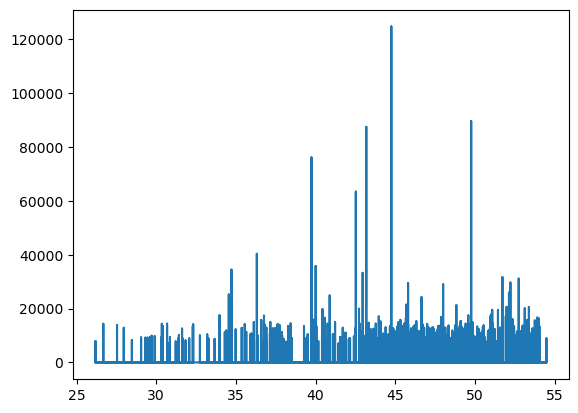

In [27]:
plt.plot(df_train_st_oil_holid["dcoilwtico"],df_train_st_oil_holid["sales"])

In [28]:
mean_sale=df_train_st_oil_holid["dcoilwtico"].mean()

In [29]:
mean_sale

45.054988962453365

In [30]:
df_train_st_oil_holid["dcoilwtico"].fillna(mean_sale,inplace=True)

In [31]:
df_train_st_oil_holid.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188594 entries, 0 to 1188593
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1188594 non-null  int64  
 1   date         1188594 non-null  object 
 2   store_nbr    1188594 non-null  int64  
 3   family       1188594 non-null  object 
 4   sales        1188594 non-null  float64
 5   onpromotion  1188594 non-null  int64  
 6   city         1188594 non-null  object 
 7   state        1188594 non-null  object 
 8   store_type   1188594 non-null  object 
 9   cluster      1188594 non-null  int64  
 10  dcoilwtico   1188594 non-null  float64
 11  day_type     1188594 non-null  object 
 12  locale       1188594 non-null  object 
 13  locale_name  1188594 non-null  object 
 14  description  1188594 non-null  object 
 15  transferred  1188594 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 154.2+ MB


In [32]:
# Convert the 'date' column to datetime
df_train_st_oil_holid['date'] = pd.to_datetime(df_train_st_oil_holid['date'])

In [33]:
# Create a new column based on the date column to show that wages are paid at the end of the month and on 15th
df_train_st_oil_holid['Wage_date'] = df_train_st_oil_holid['date'].apply(lambda x: 'Wage day' if x.is_month_end else ('Wage day' if x.day == 15 else 'Regular day'))


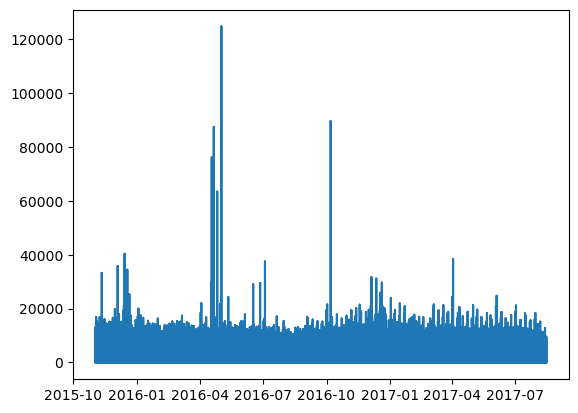

In [34]:
plt.plot(df_train_st_oil_holid["date"],df_train_st_oil_holid["sales"])

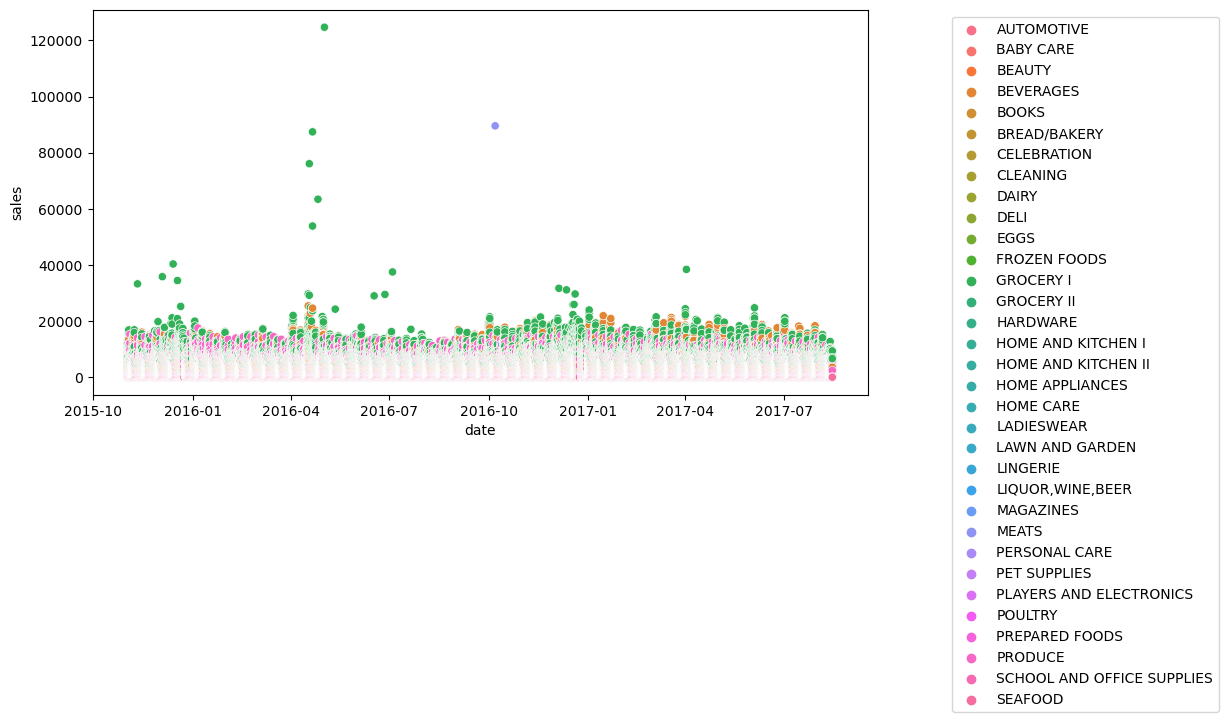

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_train_st_oil_holid,x="date",y="sales",hue="family")
plt.legend(bbox_to_anchor = [1.1, 1])

In [36]:
# The big spike around April 2016 corresponds to earthquake 
# We can see a periodic structure 
#Grocery sales dominate

<AxesSubplot:xlabel='Wage_date', ylabel='sales'>

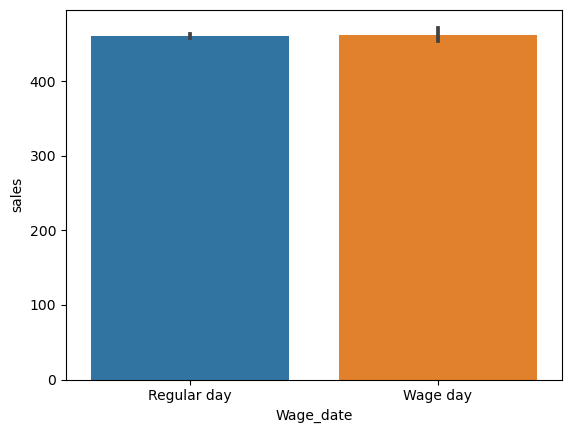

In [37]:
sns.barplot(data=df_train_st_oil_holid,x="Wage_date",y="sales")

In [38]:
#There doesn't seem to be big difference between sales on wage days regular days

<AxesSubplot:xlabel='day_type', ylabel='sales'>

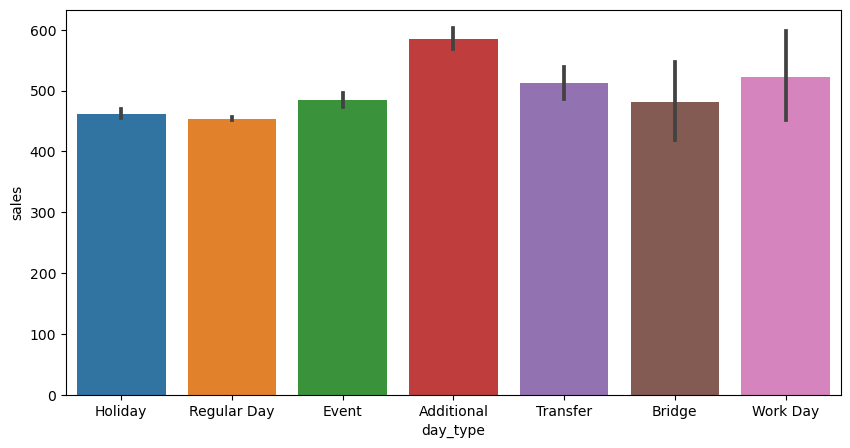

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train_st_oil_holid,x="day_type",y="sales")

In [40]:
#We can see that most of the sales are on Additional holidays that are days added a regular calendar holiday

<AxesSubplot:xlabel='family', ylabel='sales'>

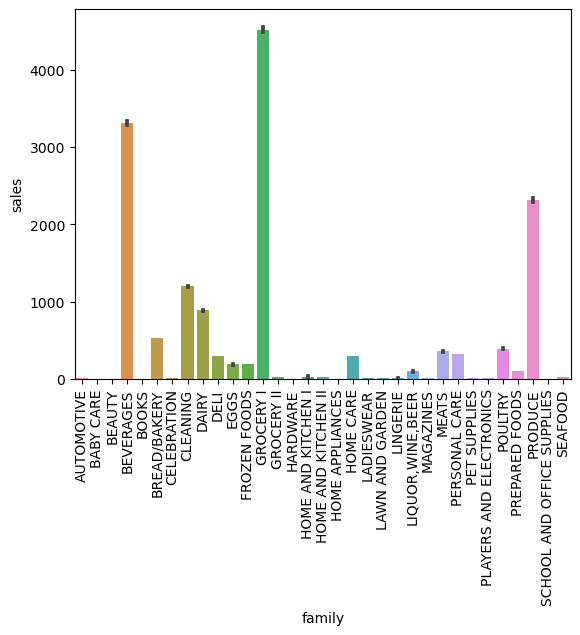

In [41]:
plt.xticks(rotation=90)
sns.barplot(data=df_train_st_oil_holid,x="family" ,y="sales")

In [42]:
#We can see that Grocery 1 category is the most popular

In [43]:
obj_feature=["family","city","state","store_type","day_type","locale","locale_name","description","transferred","Wage_date"]

In [44]:
df_dummies=pd.get_dummies(df_train_st_oil_holid[obj_feature],drop_first=True)

In [45]:
df_train_st_oil_holid=pd.concat([df_train_st_oil_holid,df_dummies],axis=1)

In [46]:
df_train_st_oil_holid.set_index("date")

,id,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,dcoilwtico,...,description_Terremoto Manabi+8,description_Terremoto Manabi+9,description_Traslado Batalla de Pichincha,description_Traslado Fundacion de Guayaquil,description_Traslado Primer Grito de Independencia,description_Traslado Primer dia del ano,description_Viernes Santo,transferred_True,transferred_False,Wage_date_Wage day
date,,,,,,,,,,,,,,,,,,,,,
2015-11-02,1840806,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,46.12,...,0,0,0,0,0,0,0,0,0,0
2015-11-02,1840807,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,46.12,...,0,0,0,0,0,0,0,0,0,0
2015-11-02,1840808,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,46.12,...,0,0,0,0,0,0,0,0,0,0
2015-11-02,1840809,1,BEVERAGES,559.000,8,Quito,Pichincha,D,13,46.12,...,0,0,0,0,0,0,0,0,0,0
2015-11-02,1840810,1,BOOKS,0.000,0,Quito,Pichincha,D,13,46.12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,...,0,0,0,0,0,0,0,0,0,1
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,...,0,0,0,0,0,0,0,0,0,1
2017-08-15,3000885,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,...,0,0,0,0,0,0,0,0,0,1


# For now we will use in model training only table from train.csv

In [47]:
df_train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160082 entries, 0 to 1160081
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1160082 non-null  int64  
 1   date         1160082 non-null  object 
 2   store_nbr    1160082 non-null  int64  
 3   family       1160082 non-null  object 
 4   sales        1160082 non-null  float64
 5   onpromotion  1160082 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 53.1+ MB


In [48]:
df_train["date"]=pd.to_datetime(df_train["date"])

In [49]:
df_train=df_train.set_index(["date","store_nbr","family"])

In [50]:
df_train.head(2)

id  sales  onpromotion
date       store_nbr family                                 
2015-11-02 1         AUTOMOTIVE  1840806    2.0            0
                     BABY CARE   1840807    0.0            0

In [51]:
df_train.groupby("date").mean()

,id,sales,onpromotion
date,,,
2015-11-02,1841696.5,427.917955,0.962402
2015-11-03,1843478.5,579.932173,2.187430
2015-11-04,1845260.5,480.075443,5.073513
2015-11-05,1847042.5,364.569400,1.050505
2015-11-06,1848824.5,376.625021,4.179574
...,...,...,...
2017-08-11,2992868.5,463.733851,7.956790
2017-08-12,2994650.5,444.798280,4.664422
2017-08-13,2996432.5,485.768618,5.209315


In [52]:
df_group=df_train.groupby("date").mean()["sales"]

In [53]:
df_train=df_group.to_frame()

In [54]:
len(df_train)

651

In [55]:
#Lets also group table for test predictions
df_forpred=pd.read_csv("test.csv")
len(df_forpred)

28512

In [56]:
df_forpred

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [57]:
df_forpred["date"]=pd.to_datetime(df_forpred["date"])

In [58]:
df_forpred=df_forpred.set_index(["date","store_nbr","family"])

In [59]:
df_forpred=df_forpred.groupby("date").mean()

In [60]:
len(df_forpred)

16

# Preparing data for model training

In [61]:
#We need to predict for 16 days in 2017(2017-08-16 - 2017-08-31)

In [62]:
#We select 2 years based on sales plot as function of time
df_train=df_train.loc['2015-08-15':'2017-08-15']

In [63]:
df_train = df_train.round(2)

In [64]:
#We will save data for last 2 months as test sample
test_ind=120

In [65]:
train = df_train.iloc[:-test_ind]
test = df_train.iloc[-test_ind:]

In [66]:
train

,sales
date,
2015-11-02,427.92
2015-11-03,579.93
2015-11-04,480.08
2015-11-05,364.57
2015-11-06,376.63
...,...
2017-04-13,413.60
2017-04-14,415.76
2017-04-15,504.27


# Scale data

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler=MinMaxScaler()

In [69]:
scaler.fit(train)

MinMaxScaler()

In [70]:
scaled_train=scaler.transform(train)

In [71]:
scaled_test=scaler.transform(test)

In [72]:
scaled_train.shape

(531, 1)

# Time Series generator

In [73]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator



#We are using TimeseriesGenerator class that takes in a sequence of data-points gathered at equal intervals, 
#along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

In [74]:
# define generator
length = 30 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [75]:
len(scaled_train)

531

In [76]:
len(generator) 

501

In [77]:
# What does the first batch look like?
X,y = generator[0]

In [78]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.51721216 0.70389929 0.58127111 0.4394105  0.45422168 0.63242247
 0.73417255 0.46283083 0.42139392 0.46703101 0.34105005 0.4235677
 0.58961007 0.71955788 0.48547743 0.41822536 0.46303961 0.37793061
 0.45040221 0.58694504 0.69177771 0.47182069 0.41393921 0.44578446
 0.3571876  0.43625422 0.57789377 0.72953024 0.516856   0.58273258]
Predict this y: 
 [[0.58937673]]


In [79]:
#Given sales for first 30 rows (X) predict sales on 31th(y)
scaled_train[30]

array([0.58937673])

# Create a model

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [81]:
scaled_train.shape #1 corresponds to number of columns to be predicted

(531, 1)

In [82]:
#define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [83]:
scaled_train.shape[1]

1

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [85]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=batch_size)

In [86]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


501/501 [==============================] - 6s 8ms/step - loss: 0.0215 - val_loss: 0.0140
Epoch 2/10
501/501 [==============================] - 4s 9ms/step - loss: 0.0166 - val_loss: 0.0143


In [87]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

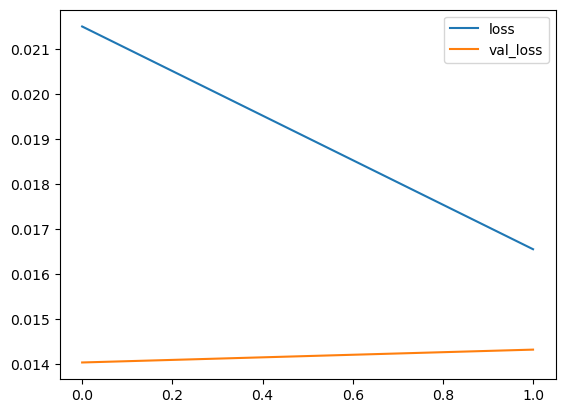

In [88]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluate

In [89]:
first_eval_batch = scaled_train[-length:]

In [90]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [91]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 442ms/step


array([[0.6116701]], dtype=float32)

In [92]:
scaled_test[0]

array([0.4859564])

### Lets predict into entire test range

In [93]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [94]:
test_predictions

[array([0.6116701], dtype=float32),
 array([0.6193182], dtype=float32),
 array([0.6224275], dtype=float32),
 array([0.6253198], dtype=float32),
 array([0.62845135], dtype=float32),
 array([0.6319759], dtype=float32),
 array([0.6358148], dtype=float32),
 array([0.63979274], dtype=float32),
 array([0.64375174], dtype=float32),
 array([0.64760745], dtype=float32),
 array([0.65127474], dtype=float32),
 array([0.65467143], dtype=float32),
 array([0.6577852], dtype=float32),
 array([0.66057473], dtype=float32),
 array([0.6629758], dtype=float32),
 array([0.66505986], dtype=float32),
 array([0.6669053], dtype=float32),
 array([0.6685421], dtype=float32),
 array([0.6699922], dtype=float32),
 array([0.67129624], dtype=float32),
 array([0.67245984], dtype=float32),
 array([0.67346936], dtype=float32),
 array([0.6743287], dtype=float32),
 array([0.675101], dtype=float32),
 array([0.67580056], dtype=float32),
 array([0.6764281], dtype=float32),
 array([0.6769962], dtype=float32),
 array([0.6775091

In [95]:
scaled_test

array([[0.4859564 ],
       [0.49872889],
       [0.45742708],
       [0.54011667],
       [0.66359226],
       [0.77739024],
       [0.51205404],
       [0.48719681],
       [0.53003377],
       [0.42235186],
       [0.54139392],
       [0.72790912],
       [0.70927848],
       [0.89223212],
       [0.61698496],
       [0.62865213],
       [0.48557568],
       [0.52978815],
       [0.70802579],
       [0.83756831],
       [0.52669328],
       [0.48499846],
       [0.51965613],
       [0.43871047],
       [0.51877188],
       [0.76147375],
       [0.60104391],
       [0.55889469],
       [0.54839423],
       [0.57155665],
       [0.42482039],
       [0.52494934],
       [0.70543445],
       [0.8200307 ],
       [0.52849862],
       [0.49005834],
       [0.50601167],
       [0.41903592],
       [0.67018729],
       [0.63414185],
       [0.72342647],
       [0.52703715],
       [0.5033712 ],
       [0.58303961],
       [0.52018422],
       [0.62463617],
       [0.80224747],
       [0.940

In [96]:
#Inverse transformation and comparision

In [97]:
true_predictions = scaler.inverse_transform(test_predictions)

In [98]:
true_predictions

array([[504.83236007],
       [511.05983396],
       [513.59161071],
       [515.94662998],
       [518.49650958],
       [521.36636779],
       [524.49218947],
       [527.73123883],
       [530.95485467],
       [534.09436267],
       [537.08045761],
       [539.84621236],
       [542.38158056],
       [544.65297733],
       [546.60803547],
       [548.30499469],
       [549.80762744],
       [551.1403944 ],
       [552.32115576],
       [553.38296252],
       [554.33042535],
       [555.15243016],
       [555.8521316 ],
       [556.48097475],
       [557.05060753],
       [557.56156382],
       [558.02413262],
       [558.44180833],
       [558.80420485],
       [559.10797341],
       [559.3800984 ],
       [559.61635744],
       [559.81961399],
       [559.99472135],
       [560.14570777],
       [560.27640736],
       [560.38958651],
       [560.48791453],
       [560.57323569],
       [560.64705451],
       [560.71072991],
       [560.76566936],
       [560.81279498],
       [560

In [99]:
test["sales"]

date
2017-04-18    402.47
2017-04-19    412.87
2017-04-20    379.24
2017-04-21    446.57
2017-04-22    547.11
               ...  
2017-08-11    463.73
2017-08-12    444.80
2017-08-13    485.77
2017-08-14    427.00
2017-08-15    427.98
Name: sales, Length: 120, dtype: float64

In [100]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [101]:
true_predictions.index=test.index

In [102]:
true_predictions

,sales
date,
2017-04-18,504.832360
2017-04-19,511.059834
2017-04-20,513.591611
2017-04-21,515.946630
2017-04-22,518.496510
...,...
2017-08-11,561.062304
2017-08-12,561.062352
2017-08-13,561.062352


In [103]:
true_predictions["true sales"]=test

In [104]:
true_predictions.head(3)

,sales,true sales
date,,
2017-04-18,504.832360,402.47
2017-04-19,511.059834,412.87
2017-04-20,513.591611,379.24


<AxesSubplot:xlabel='date'>

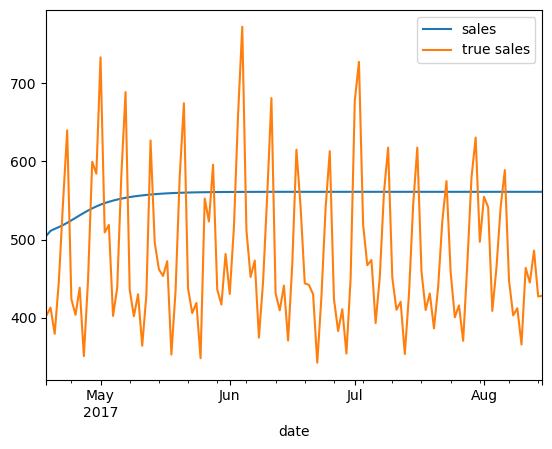

In [105]:
true_predictions.plot()

# Saving the model

In [106]:
from tensorflow.keras.models import load_model

In [107]:
#Save model  in HDF5 file 
model.save("StoreSales_TimeSeriesForecast.h5")

## Predicting into future

In [108]:
df_forpred

,id,onpromotion
date,,
2017-08-16,3001778.5,17.137486
2017-08-17,3003560.5,4.211560
2017-08-18,3005342.5,7.731201
2017-08-19,3007124.5,4.833895
2017-08-20,3008906.5,5.338384
2017-08-21,3010688.5,4.545455
2017-08-22,3012470.5,5.777217
2017-08-23,3014252.5,9.259259
2017-08-24,3016034.5,4.639731


In [109]:
#Lets predict into future from 2017-08-16 - 2017-08-31

In [110]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df_train)

In [111]:
length=12
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [112]:
#define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_full_data.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_full_data.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=3)

Epoch 1/3


C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == "":


639/639 [==============================] - 4s 4ms/step - loss: 0.0208
Epoch 2/3
639/639 [==============================] - 2s 4ms/step - loss: 0.0166
Epoch 3/3
639/639 [==============================] - 2s 4ms/step - loss: 0.0126


In [113]:
forecast=[]
periods=12

first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(df_forpred)):
    
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)#remove first item from the batch and append new prediction at the end

1/1 [==============================] - 0s 17ms/step


In [114]:
true_forecast = scaler.inverse_transform(forecast)

In [115]:
true_forecast = pd.DataFrame(data=true_forecast,columns=["sales"],index=df_forpred.index)

In [116]:
true_forecast

,sales
date,
2017-08-16,386.339714
2017-08-17,384.899543
2017-08-18,410.574854
2017-08-19,444.085734
2017-08-20,455.333858
2017-08-21,442.937296
2017-08-22,419.685581
2017-08-23,399.236750
2017-08-24,399.914126


(17348.0, 17409.0)

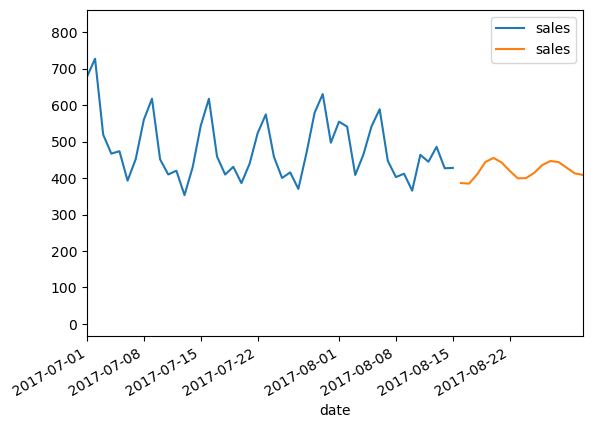

In [117]:
ax=df_train.plot()
true_forecast.plot(ax=ax)
#plt.xlim("2015-10-01","2017-08-31")
plt.xlim("2017-07-01","2017-08-31")

In [118]:
scaled_full_data

array([[0.51721216],
       [0.70389929],
       [0.58127111],
       [0.4394105 ],
       [0.45422168],
       [0.63242247],
       [0.73417255],
       [0.46283083],
       [0.42139392],
       [0.46703101],
       [0.34105005],
       [0.4235677 ],
       [0.58961007],
       [0.71955788],
       [0.48547743],
       [0.41822536],
       [0.46303961],
       [0.37793061],
       [0.45040221],
       [0.58694504],
       [0.69177771],
       [0.47182069],
       [0.41393921],
       [0.44578446],
       [0.3571876 ],
       [0.43625422],
       [0.57789377],
       [0.72953024],
       [0.516856  ],
       [0.58273258],
       [0.58937673],
       [0.45816395],
       [0.50811176],
       [0.65756217],
       [0.77949033],
       [0.55841572],
       [0.48276328],
       [0.5071047 ],
       [0.44476512],
       [0.47988947],
       [0.62273258],
       [0.72180534],
       [0.55102241],
       [0.5291004 ],
       [0.58431686],
       [0.54978201],
       [0.60750384],
       [0.746